# 3 Nonlinear Equations and Complementarity Problems 

In [194]:

import numpy as np
from numpy import append, array, diagonal, tril, triu
from numpy.linalg import inv
from scipy.linalg import lu
#from scipy.linalg import solve
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

from sympy import *
import sympy as sym
init_printing()

One of the most basic numerical operations encountered in computational economics
is to find the solution of a system of nonlinear equations. Nonlinear equations generally
arise in one of two forms. In the nonlinear *rootfinding problem*, a function f
mapping $R^n$ to $R^n$ is given and one must compute an n-vector $x$, called a *root* of $f$,
that satisfies

$$f(x) = 0$$


In the nonlinear fixed-point problem, a function $g$ from $R^n$ to $R^n$ is given and one
must compute an n-vector x called a fixed-point of $g$, that satisfies

$$x = g(x)$$


The two forms are equivalent. The rootfinding problem may be recast as a fixed-point
problem by letting $g(x) = x - f(x)$; conversely, the fixed-point problem may be recast
as a rootfinding problem by letting $f(x) = x - g(x)$.


In the related complementarity problem, two n-vectors $a$ and $b$, with $a < b$, and
a function f from $R^n$ to $R^n$ are given, and one must compute an n-vector $x \in [a; b]$,
that satisfies


$$x_i > a_i \rightarrow f_i(x) \forall i = 1,...,n$$

$$x_i < b_i \rightarrow f_i(x) \forall i = 1,...,n$$


The rootfinding problem is a special case of complementarity problem in which $a_i =
-\inf$ and $b_i = +\inf$ for all i. However, the complementarity problem is not simply to
find a root that lies within specified bounds. An element $f_i(x)$ may be nonzero at a
solution of the complementarity problem, provided that $x_i$ equals one of the bounds
$a_i$ or $b_i$.




https://github.com/QuantEcon/QuantEcon.lectures.code


## 3.1 Bisection Method

The bisection method is perhaps the simplest and most robust method for computing
the root of a continuous real-valued function defined on a bounded interval of the real line.



The bisection method is an iterative procedure. Each iteration begins with an
interval known to contain or to bracket a root of f, meaning the function has diffierent
signs at the interval endpoints. The interval is bisected into two subintervals of equal
length.

The bisection method's greatest strength is its robustness. In contrast to other
rootfinding methods, the bisection method is guaranteed to compute a root to a
prescribed tolerance in a known number of iterations, provided valid data are input.


https://lectures.quantecon.org/py/scipy.html#roots-and-fixed-points

https://en.wikipedia.org/wiki/Bisection_method

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/375px-Bisection_method.svg.png)

In [195]:
#%pylab inline
%matplotlib notebook
# pylab Populating the interactive namespace from numpy and matplotlib
# numpy for numerical computation
# matplotlib for ploting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     # 3d

<IPython.core.display.Javascript object>


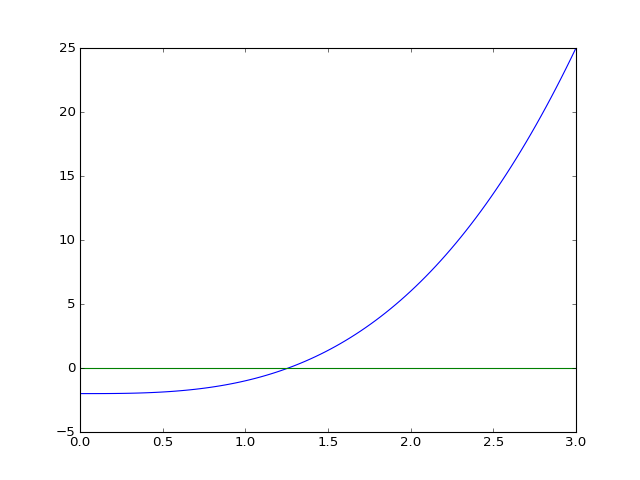

In [196]:
x = np.linspace(0,3,100)
plt.plot(x,x**3-2)
plt.plot(x, x-x)

In [197]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:  
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In fact SciPy provides it’s own bisection function,

In [198]:
from scipy.optimize import bisect
f =lambda x: x**3-2
#f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f, 0, 2)

## 3.2 Function Iteration
Function iteration is a relatively simple technique that may be used to compute a
fixed-point, $x = g(x)$, of a function from $R^n$ to $R^n$. The technique is also applicable
to a rootfinding problem $f(x) = 0$, by recasting it as the equivalent fixed-point
problem $x = x - f(x)$.


https://en.wikipedia.org/wiki/Fixed-point_iteration


![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/Sine_fixed_point.svg/375px-Sine_fixed_point.svg.png)

In [199]:
def myfixpoint(f, x0, maxit = 1000,tol=10e-5):
    # 
    x = x0
    for it in range(maxit):
        xold = x
        x = f(x) 
        diff = np.linalg.norm(x - xold)

        if diff < tol:
            
            return x


In [200]:
def g(x):
    return x**0.5

In [201]:
g = lambda x: x**0.5

In [202]:
myfixpoint(g, x0=0.4)

SciPy has a function for finding (scalar) fixed points too

In [203]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**0.5, 0.4)  # 0.4 is an initial guess

array(1.0)

## 3.3 Newton's Method


In practice, most nonlinear rootfinding problems are solved using *Newton's method*
or one of its variants. Newton's method is based on the principle of *successive linearization*. Successive linearization calls for a hard nonlinear problem to be replaced
with a sequence of simpler linear problems whose solutions converge to the solution
of the nonlinear problem. Newton's method is typically formulated as a rootfinding
technique, but may be used to solve a fixed-point problem $x = g(x)$ by recasting it
as the rootfinding problem $f(x) = x - g(x) = 0$.


$$x:f(x)=0\,.$$

The method starts with a function f defined over the real numbers x, the function's derivative f ′, and an initial guess x0 for a root of the function f. If the function satisfies the assumptions made in the derivation of the formula and the initial guess is close, then a better approximation x1 is

$$ x_{1}=x_{0}-{\frac {f(x_{0})}{f'(x_{0})}}\,.$$


Geometrically, $(x1, 0)$ is the intersection of the x-axis and the tangent of the graph of f at $(x0, f (x0))$.

The process is repeated as

$$ x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}\,$$
until a sufficiently accurate value is reached.

#### Derivation

Suppose $f : [a, b] → ℝ$ is a differentiable function defined on the interval $[a, b]$ with values in the real numbers $ℝ$. The formula for converging on the root can be easily derived. Suppose we have some current approximation xn. Then we can derive the formula for a better approximation, $x_{n + 1}$ by referring to the diagram on the right. The equation of the tangent line to the curve $y = f (x)$ at the point $x = x_n$ is



$$ y=f'(x_{n})\,(x-x_{n})+f(x_{n}),$$


where $f′$ denotes the derivative of the function $f$.


The x-intercept of this line (the value of $x$ such that $y = 0$) is then used as the next approximation to the root, $x_{n+1}$. In other words, setting $y$ to zero and $x$ to $x_{n+1}$ gives

$$ 0=f'(x_{n})\,(x_{n+1}-x_{n})+f(x_{n}).$$
Solving for $x_{n+1}$ gives

$$ {\displaystyle x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}.}$$

https://en.wikipedia.org/wiki/Newton%27s_method

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/NewtonIteration_Ani.gif/450px-NewtonIteration_Ani.gif)



In SciPy this algorithm is implemented by scipy.optimize.newton

Unlike bisection, the Newton-Raphson method uses local slope information

This is a double-edged sword:

- When the function is well-behaved, the Newton-Raphson method is faster than bisection
- When the function is less well-behaved, the Newton-Raphson might fail


In [204]:
from scipy.optimize import newton

f = lambda x: x**3 -2

newton(f, 0.2)   # Start the search at initial condition x = 0.2

In [205]:
newton?

## Newton 

Signature: newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None)
Docstring:
Find a zero using the Newton-Raphson or secant method.

Find a zero of the function `func` given a nearby starting point `x0`.
The Newton-Raphson method is used if the derivative `fprime` of `func`
is provided, otherwise the secant method is used.  If the second order
derivate `fprime2` of `func` is provided, parabolic Halley's method
is used.

### Parameters


func : function

    The function whose zero is wanted. It must be a function of a
    **single variable
    ** of the form f(x,a,b,c...), where a,b,c... are extra
    arguments that can be passed in the `args` parameter.
    
x0 : float

    An initial estimate of the zero that should be somewhere near the
    actual zero.
    
fprime : function, optional

    The derivative of the function when available and convenient. If it
    is None (default), then the secant method is used.



Since `newton` only take one variable function. We use `fsolve` in scipy.optimize

### Example: Cournot Duopoly



To illustrate the use of this function, consider a simple Cournot duopoly model, in which the inverse demand for a good is





In [206]:
q = np.array([1, 1])
c = np.array([0.6, 0.8])
eta = 1.6
e = -1/eta    


In [207]:
fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+(e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
q = q - np.linalg.inv(fjac).dot(fval)
q

array([ 0.68765683,  0.55048639])

In [208]:
fval

array([-0.1542114, -0.3542114])

In [209]:
fjac

array([[-0.67598669,  0.12664449],
       [ 0.12664449, -0.87598669]])

### Newton method

In [210]:
maxit = 1000
tol = 1/10000
# start from [0.2 0.2] will break 
#q = np.array([1, 1])
#c = np.array([0.6, 0.8])
#eta = 1.6
#e = -1/eta

for it in np.arange(maxit):

    fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
    fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+(e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
    q = q - np.linalg.inv(fjac).dot(fval)
    if np.linalg.norm(fval)<tol:
        break
        
q

array([ 0.83961268,  0.68883816])

In [211]:
fval

array([  5.34511334e-05,   6.51508959e-05])

In [212]:
def cournot(q):
    c = np.array([0.6, 0.8])
    eta = 1.6
    e = -1 / eta
    fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
    fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
            (e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
    return fval, fjac

In [213]:
def mynewton(f, x0, maxit=1000, tol=1/1000 ):
    x = x0
    for it in np.arange(maxit):
        fval, fjac = f(x)
        x = x - np.linalg.inv(fjac).dot(fval)
        if np.linalg.norm(fval)<tol:
            break
    return x    

In [214]:
mynewton(cournot, x0 = np.array([1, 1])) # converge 

array([ 0.84001971,  0.689215  ])

#### without backstepping, it does not converge with x0= np.array([0.2, 0.2]). It is overstepping too far.



In [215]:
mynewton(cournot, x0 = np.array([0.2, 0.2])) # break ? without 

array([ nan,  nan])

More robust implementation can be found in
https://github.com/randall-romero/CompEcon-python/blob/master/compecon/nonlinear.py

### fsolve function

Since scipy.optimize.newton only take one variable function. We use fsolve in scipy.optimize

In [216]:
from scipy.optimize import fsolve

In [217]:

def cournot(q):
    c = np.array([0.6, 0.8])
    eta = 1.6
    e = -1/eta
    fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
    fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+(e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
    return fval

def cournotjac(q):
    c = np.array([0.6, 0.8])
    eta = 1.6
    e = -1/eta
    fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
    fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+(e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
    return fjac    



In [218]:
q = fsolve(func = cournot, x0= np.array([0.2, 0.2]))  # without jacobian

In [219]:
q

array([ 0.8395676 ,  0.68879643])

In [220]:
q = fsolve(func = cournot,x0= np.array([0.2, 0.2]), fprime= cournotjac)  # with jacobian

In [221]:
q

array([ 0.8395676 ,  0.68879643])

## 3.4 Quasi-Newton Methods

Quasi-Newton methods offer an alternative to Newton's method for solving rootfinding
problems. Quasi-Newton methods are based on the same successive linearization
principle as Newton's method, except that they replace the Jacobian $f'$ with an
estimate that is easier to compute. Quasi-Newton methods are easier to implement
and less likely to fail due to programming errors than Newton's method because the
analyst need not explicitly code the derivative expressions. Quasi-Newton methods,
however, often converge more slowly than Newton's method and additionally require
the analyst to supply an initial estimate of the function's Jacobian.



The **secant method** is the most widely used univariate quasi-Newton method. The
secant method is identical to the univariate Newton method, except that it replaces
the derivative of f with a finite-difference approximation constructed from the function
values at the two previous iterates:






https://en.wikipedia.org/wiki/Secant_method

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Secant_method.svg/450px-Secant_method.svg.png)






Newton's method to find zeroes of a function ${\displaystyle g}$ of multiple variables is given by: $ x_{n+1}=x_{n}-[J_{g}(x_{n})]^{-1}g(x_{n})\,\!$ where ${\displaystyle [J_{g}(x_{n})]^{-1}}$ is the left inverse of the Jacobian matrix $ J_{g}(x_{n})$ of ${\displaystyle g}$ evaluated for ${\displaystyle x_{n}}$.

Strictly speaking, any method that replaces the exact Jacobian ${\displaystyle J_{g}(x_{n})}$ with an approximation is a **quasi-Newton method.** 

$$f'(x_{n-1}) ~= {\frac {f(x_{n-1})-f(x_{n-2})} {x_{n-1}-x_{n-2}}   }$$


$${\displaystyle x_{n}=x_{n-1}-f(x_{n-1}){\frac {x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})}}={\frac {x_{n-2}f(x_{n-1})-x_{n-1}f(x_{n-2})}{f(x_{n-1})-f(x_{n-2})}}}  $$

#### *Broyden's method* 

is the most popular multivariate generalization of the univariate
secant method. Broyden's method generates a sequence of vectors $x^{(k)}$ and matrices
$A^{(k)}$ that approximate the root of $f$ and the Jacobian $f'$ at the root, respectively.



Broyden's method begins with the analyst supplying a guess $x^{(0)}$ for the root of the
function and a guess $A^{(0)}$ for the Jacobian of the function at the root. Often, $A^{(0)}$
is set equal to the numerical Jacobian of f at $x^{(0)}$. 


Alternatively, some analysts use
a rescaled identity matrix for $A^{(0)}$, though this typically will require more iterations
to obtain a solution than if a numerical Jacobian is computed at the outset. Given
$x^{(k)}$ and $A^{(k)}$, one updates the root approximation by solving the linear rootfinding
problem obtained by replacing f with its first-order Taylor approximation about $x^{(k)}$:


https://en.wikipedia.org/wiki/Broyden%27s_method



To solve a system of $k$ nonlinear equations

$${\displaystyle \mathbf {f} (\mathbf {x} )=\mathbf {0} ,}$$ 


where $f$ is a vector-valued function of vector $x$:


$${\displaystyle \mathbf {x} =(x_{1},x_{2},x_{3},\dotsc ,x_{k})}$$

$${\displaystyle \mathbf {f} (\mathbf {x} )=(f_{1}(x_{1},x_{2},\dotsc ,x_{k}),f_{2}(x_{1},x_{2},\dotsc ,x_{k}),\dotsc ,f_{k}(x_{1},x_{2},\dotsc ,x_{k}))} $$





For such problems, Broyden gives a generalization of the one-dimensional Newton's method, replacing the derivative with the Jacobian J. The Jacobian matrix is determined iteratively based on the secant equation in the finite difference approximation:

$${\displaystyle \mathbf {J} _{n}(\mathbf {x} _{n}-\mathbf {x} _{n-1})\simeq \mathbf {f} (\mathbf {x} _{n})-\mathbf {f} (\mathbf {x} _{n-1}),} $$

where n is the iteration index. For clarity, let us define:

$${\displaystyle \mathbf {f} _{n}=\mathbf {f} (\mathbf {x} _{n}),} $$
$${\displaystyle \Delta \mathbf {x} _{n}=\mathbf {x} _{n}-\mathbf {x} _{n-1},} $$
$${\displaystyle \Delta \mathbf {f} _{n}=\mathbf {f} _{n}-\mathbf {f} _{n-1},}$$




so the above may be rewritten as:

$${\displaystyle \mathbf {J} _{n}\Delta \mathbf {x} _{n}\simeq \Delta \mathbf {f} _{n}.} $$


The above equation is underdetermined when $k$ is greater than one. 

Broyden suggests using the current estimate of the Jacobian matrix $\mathbf {J} _{n-1}$ and improving upon it by taking the solution to the secant equation that is a minimal modification to $\mathbf {J} _{n-1}$:

$${\displaystyle \mathbf {J} _{n}=\mathbf {J} _{n-1}+{\frac {\Delta \mathbf {f} _{n}-\mathbf {J} _{n-1}\Delta \mathbf {x} _{n}}{\|\Delta \mathbf {x} _{n}\|^{2}}}\Delta \mathbf {x} _{n}^{\mathrm {T} }} $$



This minimizes the following Frobenius norm:

$${\displaystyle \|\mathbf {J} _{n}-\mathbf {J} _{n-1}\|_{\mathrm {f} }.} $$
We may then proceed in the Newton direction:

$${\displaystyle \mathbf {x} _{n+1}=\mathbf {x} _{n}-\mathbf {J} _{n}^{-1}\mathbf {f} (\mathbf {x} _{n}).}$$


Broyden also suggested using the Sherman-Morrison formula to update directly the inverse of the Jacobian matrix:


$${\displaystyle \mathbf {J} _{n}^{-1}=\mathbf {J} _{n-1}^{-1}+{\frac {\Delta \mathbf {x} _{n}-\mathbf {J} _{n-1}^{-1}\Delta \mathbf {f} _{n}}{\Delta \mathbf {x} _{n}^{\mathrm {T} }\mathbf {J} _{n-1}^{-1}\Delta \mathbf {f} _{n}}}\Delta \mathbf {x} _{n}^{\mathrm {T} }\mathbf {J} _{n-1}^{-1}} $$


This first method is commonly known as the **"good Broyden's method".**

In theory, Broyden's method converges if $f$ is continuously differentiable, if $x_0$
is "sufficiently" close to a root of $f$ at which $f_0$ is invertible, and if $J_0^{-1}$ are
"sufficiently" close to the Jacobian or inverse Jacobian of $f$ at that root.



Like Newton's method, the robustness of Broyden's method depends on the regularity of
f and its derivatives. Broyden's method may also have diÆculty computing a precise
root estimate if f0 is ill-conditioned near the root.

In [222]:
#https://github.com/randall-romero/CompEcon-python/blob/master/compecon/tools.py
# The script also computes an initial guess for the inverse Jacobian by inverting the finite difierence derivative computed
# using the toolbox function fdjac, which is discussed in Chapter 5 (page 107).
def jacobian(func, x, *args, **kwargs):

    # if type(func(x, *args, **kwargs)) is tuple:
    #     F = lambda x: func(x, *args, **kwargs)[0]
    # else:
    #     F = lambda x: func(x, *args, **kwargs)
    F = lambda z: func(z, *args, **kwargs)

    x = x.flatten()
    dx = x.size
    f = F(x)
    df = f.size
    x = x.astype(float)

    ''' Compute Jacobian'''
    tol = np.spacing(1) ** (1/3)

    h = tol * np.maximum(abs(x), 1)
    x_minus_h = x - h
    x_plus_h = x + h
    deltaX = x_plus_h - x_minus_h
    fx = np.zeros((dx, df))

    for k in range(dx):
        xx = x.copy()
        xx[k] = x_plus_h[k]
        fplus = F(xx)

        xx[k] = x_minus_h[k]
        fminus = F(xx)

        fx[k] = np.squeeze((fplus - fminus) / deltaX[k])  # fixme doing this to deal with broadcasting

    return fx.T


In [229]:
def cournot(q):
    c = np.array([0.6, 0.8])
    eta = 1.6
    e = -1 / eta
    fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
    fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
            (e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
    return fval

In [230]:
f = cournot
x = np.array([0.2, 0.2])

In [231]:
fval = f(x)
fval

array([ 1.09894808,  1.05894808])

In [232]:
# using function to calculate Jacobian
fjac = jacobian(cournot,np.array([0.2, 0.2]) )
fjac

array([[-3.88977465, -0.5194381 ],
       [-0.5194381 , -4.08977465]])

In [233]:
# using numpy to calculate inversed Jacobian
fjacinv = np.linalg.pinv(np.atleast_2d(fjac))
fjacinv 

array([[-0.26151986,  0.03321537],
       [ 0.03321537, -0.2487309 ]])

In [235]:
maxit = 100
tol = 1/100

for it in range(maxit):
    fnorm = np.linalg.norm(fval)
    if fnorm<tol: 
        break 
    d = -(fjacinv.dot(fval))
    x = x+d
    fold = fval
    fval = f(x)
    u = fjacinv.dot((fval-fold))
    fjacinv = fjacinv + np.outer((d-u), np.dot(d.T, fjacinv))/np.dot(d.T,u) ## ? np.outer!!!!! Key
x   

array([ 0.83480764,  0.68819305])

In linear algebra, an outer product is the tensor product of two coordinate vectors, a special case of the Kronecker product of matrices. The outer product of two coordinate vectors ${\displaystyle \mathbf {u} } $  and ${\displaystyle \mathbf {v} } $ , denoted ${\displaystyle \mathbf {u} \otimes \mathbf {v} } $, is a matrix ${\displaystyle \mathbf {w} } $  such that the coordinates satisfy ${\displaystyle w_{ij}=u_{i}v_{j}} $. The outer product for general tensors is also called the tensor product.

The outer product contrasts with the dot product, which takes as input a pair of coordinate vectors and produces a scalar.

(source: https://en.wikipedia.org/wiki/Outer_product)

Without analytic Jacobian, we use Broyden method to find the root.

In [246]:
def mybroyden(f, x0, maxit = 1000, tol = 1/1000):
    
    x=x0
    A = f(x)
    _is_there_jacobian = (type(A) is tuple) and (len(A) == 2)
    
    if _is_there_jacobian:
        print('Jacobian was  provided by user!')
        fval,fjac = f(x)
    else:    
        print('Jacobian was not provided by user!')
        fval = f(x)
        try:
            fjac = jacobian(f,x)
        except NameError:
            print("jacobian function Not in scope!\n Using identity matrix as jacobian matrix")
            fjac = np.identity(x.size)
        else:
            print("jacobian function In scope!")
            #fjac = jacobian(f,x)  
    # using numpy to calculate inversed Jacobian, only for initialize. later, we update it without calculation of new inversed Jacobian.
    fjacinv = np.linalg.pinv(np.atleast_2d(fjac))
    # or we can use identity matrix as an initiative matrix
    #fjacinv = - np.identity(x.size)
    for it in range(maxit):
        fnorm = np.linalg.norm(fval)
        if fnorm<tol: 
            break 
        d = -(fjacinv.dot(fval))
        # update x
        x = x+d
        fold = fval
        fval = f(x)[0] if _is_there_jacobian else f(x)# two outputs
        # update jacobian
        u = fjacinv.dot((fval-fold))
        fjacinv = fjacinv + np.outer((d-u), np.dot(d.T, fjacinv))/np.dot(d.T,u) ## ? np.outer !!! key
    return x   


In [247]:
mybroyden(cournot, np.array([0.2, 0.2]))

Jacobian was not provided by user!
jacobian function In scope!


array([ 0.83945538,  0.6889152 ])

### Scipy.optimize.broyden1

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.broyden1.html

scipy.optimize.broyden1


    scipy.optimize.broyden1(F, xin, iter=None, alpha=None, reduction_method='restart', max_rank=None, verbose=False, maxiter=None, f_tol=None, f_rtol=None, x_tol=None, x_rtol=None, tol_norm=None, line_search='armijo', callback=None, **kw)

Find a root of a function, using Broyden’s first Jacobian approximation.

This method is also known as “Broyden’s good method”.

This algorithm implements the inverse Jacobian Quasi-Newton update

![](https://docs.scipy.org/doc/scipy-0.14.0/reference/_images/math/55c80f4be075d374bb3a6683ef676f504969d3a9.png)

which corresponds to Broyden’s first Jacobian update

![](https://docs.scipy.org/doc/scipy-0.14.0/reference/_images/math/4b7a3d3206120c879b3b7b94a95c2262ffb7b62a.png)

In [42]:
from scipy.optimize import broyden1
broyden1(cournot,np.array([0.2, 0.2]) )

array([ 0.8395676 ,  0.68879643])

## 3.5 Problems With Newton Methods



Several difficulties commonly arise in the application of Newton and quasi-Newton
methods to solving multivariate non-linear equations. The most common cause of
failure of Newton-type methods is coding errors committed by the analyst. The next
most common cause of failure is the specification of a starting point that is not sufficiently
close to a root. And yet another common cause of failure is an ill-conditioned
Jacobian at the root. These problems can often be mitigated by appropriate action,
though they cannot always be eliminated altogether.

The *first cause of failure*, coding error, may seem obvious and not specific to
rootfinding problems. It must be emphasized, however, that with Newton's method,
the likelihood of committing an error in coding the analytic Jacobian of the function
is often high. A careful analyst can avoid Jacobian coding errors in two ways. First,
the analyst could use Broyden's method instead of Newton's method to solve the
rootfinding problem. Broyden's method is derivative-free and does not require the
explicit coding of the function's analytic Jacobian. Second, the analyst can perform
a simple, but highly effiective check of his code by comparing the values computed
by his analytic derivatives to those computed using finite diffierence methods. Such a
check will almost always detect an error in either the code that returns the function's
value or the code that returns its Jacobian.

The *second problem, a poor starting value*, can be partially addressed by **"backstepping"**.
If taking a full Newton (or quasi-Newton) step $x+d$ does not offer an improvement
over the current iterate $x$, then one "backsteps" toward the current iterate
$x$ by repeatedly cutting $d$ in half until $x+d$ does offer an improvement. Whether a step
$d$ offers an improvement is measured by the Euclidean norm $||f(x)|| = \frac{1}{2} f(x)^{T}f(x)$.
Clearly, $||f(x)||$ is precisely zero at a root of f, and is positive elsewhere. Thus,
one may view an iterate as yielding an improvement over the previous iterate if it
reduces the function norm, that is, if $||f(x)|| > ||f(x+ d)||$. Backstepping prevents
Newton and quasi-Newton methods from taking a large step in the wrong direction,
substantially improving their robustness.

necessarily prevent Newton type methods
from getting stuck at a local minimum of $||f(x)||$. If $||f(x)||$ must decrease with
each step, it may be difficult to find a step length that moves away from the current
value of x. Most good root-finding algorithms employ so mechanism for getting
unstuck. We use a very simple one in which the backsteps continue until either
$||f(x)|| > ||f(x+ d)||$ or $ ||f(x+ d/2)|| > ||f(x+ d)||$.

In [43]:
def cournot(q):
    c = np.array([0.6, 0.8])
    eta = 1.6
    e = -1 / eta
    fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
    fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
            (e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
    return fval, fjac

### mynewton_backstep

In [44]:
x0= np.array([0.2, 0.2])
f = cournot
def mynewton_backstep(f, x0, maxit=1000, tol=1/1000, maxsteps = 1000 ):
    x = x0
    for it in np.arange(maxit):
        fval, fjac = f(x)
        fnorm = np.linalg.norm(fval)
        if np.linalg.norm(fval)<tol:
            break
        d =   - np.linalg.inv(fjac).dot(fval)  
        fnormold = np.inf # initial fnormold
        for backstep in np.arange(maxsteps):
            fvalnew = f(x+d)[0] # first output/outcome
            fnormnew = np.linalg.norm(fvalnew)
            if fnormnew < fnorm: 
                break
            if fnormold < fnormnew: 
                d=2*d
                break
            fnormold = fnormnew;
            d = d/2;
        x = x + d

    return x    
mynewton_backstep(f,x0)  # even start from [0.2,0.2], still converge with backstepping.

array([ 0.83901993,  0.68828942])

#### even start from [0.2,0.2], still converge with backstepping.

### Note: Backtracking
Newton’s method may not converge for a variety of reasons. One potential problem occurs when the step from $x_k$ to $x_{k+1}$ is so large that the root is stepped over completely. Backtracking is a strategy that combats the problem of overstepping by moving only a fraction of the full step from $x_k$ to $x_{k+1}$.

https://github.com/OpenSourceMacro/BootCamp2017/blob/master/Computation/Wk4_DifIntOpt/ACME_Newtons.pdf

In [45]:
scipy.optimize.newton?

Object `scipy.optimize.newton` not found.


### mybroyden_backstep

In [46]:
def cournot(q):
    c = np.array([0.6, 0.8])
    eta = 1.6
    e = -1 / eta
    fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
    fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
            (e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
    return fval # for Broyden, no need for analytic jacobian

x0= np.array([0.2, 0.2])
f = cournot

In [47]:
def mybroyden_backstep(f, x0, maxit = 1000, tol = 1/1000, maxsteps = 100):
    x=x0
    fval = f(x)
    # using function to calculate Jacobian
    fjac = jacobian(f,x)
    # using numpy to calculate inversed Jacobian
    fjacinv = np.linalg.pinv(np.atleast_2d(fjac))
    for it in range(maxit):
        fnorm = np.linalg.norm(fval)
        if fnorm<tol: 
            break 
        d = -(fjacinv.dot(fval))
        fnormold = np.inf # initial fnormold
        for backstep in np.arange(maxsteps):
            fvalnew = f(x+d) # first output/outcome
            fnormnew = np.linalg.norm(fvalnew)
            if fnormnew < fnorm: 
                break
            if fnormold < fnormnew: 
                d=2*d
                break
            fnormold = fnormnew;
            d = d/2;           
        # update x
        x = x+d
        fold = fval
        fval = f(x)
        # update jacobian
        u = fjacinv.dot((fval-fold))
        fjacinv = fjacinv + ((d-u).dot(d.T)*(fjacinv))/(d.T.dot(u))
    return x  

mybroyden_backstep(f,x0)

array([ 0.8395465 ,  0.68872313])

The **third problem, an ill-conditioned Jacobian at the root**, occurs less often, but
should not be ignored. An ill-conditioned Jacobian can render inaccurately computed
Newton step dx, creating severe difficulties for the convergence of Newton and
Newton-type methods. In some cases, ill-conditioning is a structural feature of the
underlying model and cannot be eliminated. However, in many cases, ill-conditioning
is inadvertently and unnecessarily introduced by the analyst. A common source of
avoidable ill-conditioning arises when the natural units of measurements for model
variables yield values that vary vastly in order of magnitude. When this occurs, the
analyst should consider rescaling the variables so that their values have comparable
orders of magnitude, preferably close to unity. Rescaling will generally lead to faster
execution time and more accurate results.

#### ill-conditioned
https://github.com/OpenSourceMacro/BootCamp2017/blob/master/Computation/Wk4_DifIntOpt/ACME_CondStab.pdf


## 3.6 Choosing a Solution Method


Numerical analysts have special terms that they use to classify the rates at which
iterative routines converge. Specifically, a sequence of iterates x(k) is said to converge
to $x^{k}$ at a rate of order p if there is constant $C > 0$ such that




$$ ||x^{(k+1)} - x^*|| <=  C ||x^{(k)} - x^*||^p $$


for sufficiently large k. In particular, the rate of convergence is said to be linear if
$C < 1$ and $p = 1$, superlinear if $1 < p < 2$, and quadratic if $p = 2$.



The asymptotic rates of convergence of the nonlinear equation solution methods
discussed earlier are well known. The bisection method converges at a linear rate
with $C = 1/2$.



## 3.7 Complementarity Problems


Many economic models naturally take the form of a complementary problem rather
than a rootfinding or fixed point problem. In the complementarity problem, two n-
vectors a and b, with a < b, and a function f from $R^n$ to $R^n$  are given, and one must
find an n-vector $x \in [a; b]$, that satisfies




$$x_i > a_i \rightarrow f_i(x) \forall i = 1,...,n$$

$$x_i < b_i \rightarrow f_i(x) \forall i = 1,...,n$$


The complementarity conditions require that $f_i(x) = 0$ whenever $a_i < x_i < b_i$. The
complementarity problem thus includes the rootfinding problem as a special case in
which $a_i = - \inf$ and $bi = + \inf$ for all $i$. The complementarity problem, however, is not
to find a root that lies within specified bounds. An element $f_i(x)$ may be nonzero at
a solution of a complementarity problem, though only if $x_i$ equals one of its bounds.
For the sake of brevity, we denote the complementarity problem $CP(f; a; b)$.


Complementarity problems arise naturally in economic equilibrium models. In
this context, $x$ is an n-vector that represents the levels of certain economic activities.
For each $i = 1; 2; : : : ; n$, $a_i$ denotes a lower bound on activity $i$, $b_i$ denotes an upper
bound on activity $i$, and $f_i(x)$ denotes the marginal arbitrage profit associated with
activity $i$. Disequilibrium arbitrage profit opportunities exist if either $x_i < b_i$ and
$f_i(x) > 0$, in which case an incentive exists to increase $x_i$, or $x_i > a_i$ and $f_i(x) < 0$, in
which case an incentive exists to decrease $x_i$. An arbitrage-free economic equilibrium
obtains if and only if $x$ solves the complementarity problem $CP(f; a; b)$.


Complementarity problems also arise naturally in economic optimization models.

## 3.8 Complementarity Methods



Although the complementarity problem appears quite diffierent from the ordinary
rootfinding problem, it actually can be reformulated as one. In particular, x solves the
complementarity problem $CP(f; a; b)$ if and only if it solves the rootfinding problem


$$ \hat{f}(x) =min(max(f(x), a - x), b - x) = 0$$


(source, http://www.karenkopecky.net/Teaching/eco613614/Notes_ComplementarityMethods.pdf)



The equivalence, however, can easily be demonstrated graphically for the univariate complementarity problem.

Figure 3.7 illustrates minmax rootfinding formulation of the same four univariate complementarity problems examined in Figure 3.6. In all four plots, the curves y = a — x and y = b — x are drawn with narrow dashed lines, the curve y = /(x) is drawn with a narrow solid line, and the curve y = f(x) is drawn with a thick solid line; clearly, in all four figures, / lies between the lines y = x — a and y = x — b and coincides with f inside the lines. In Figure 3.7a, $f(a) < 0$ and the unique solution to the complementarity problem is $x^* = a$, which coincides with the unique root of f; in Figure 3.7b,$ f (b) > 0$ and the unique solution to the complementarity problem is $x^* = b$, which coincides with the unique root of f ; in Figure 3.7c, $f (a) > 0 > f (b)$ and the unique solution to the complementarity problem lies between a and b and coincides with the unique root of f (and f). In Figure 3.7d, f is upwardly sloped and possesses multiple roots, all of which, again, coincide with roots of f .

![](https://www.ajjacobson.us/bellman-equation/images/2348_33_7.jpg)

 f'<0, f(a)>0>f(b)
 
 
![](https://www.ajjacobson.us/bellman-equation/images/2348_33_8.jpg)

f'<0, f(b)>0

![](https://www.ajjacobson.us/bellman-equation/images/2348_33_9.jpg)

b) f'<0, f(b)>0

![](https://www.ajjacobson.us/bellman-equation/images/2348_33_10.jpg)

d) f'>0

The reformulation of the complementarity problem as a rootfinding problem suggests that it may be solved using standard rootfinding algorithms, such as Newton's method. To implement Newton's method for the minmax rootfinding formulation requires computation of the Jacobian J of f . The ith row of J may be derived directly from the Jacobian J of f:

$$\hat J_i (x) = \begin{cases}
 & J_i (x),  \text{ for } a_i - x_i < f_i(x)<b_i -x_i \\ 
 & - I_i, \,\;\; \:\:  \text{otherwise} 
\end{cases}$$

Here, Ii. is the ith row of the identity matrix.



(source https://www.ajjacobson.us/bellman-equation/complementarity-methods.html

http://www.codecogs.com/latex/eqneditor.php)

In [48]:
# def cournot(q):
#     c = np.array([0.6, 0.8])
#     eta = 1.6
#     e = -1 / eta
#     fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
#     fjac = e*np.sum(q)**(e-1)*(np.ones([2,2]))+e*np.sum(q)**(e-1)*(np.eye(2))+\
#             (e-1)*e*np.sum(q)**(e-2)*(q).dot(np.array([1, 1]))-np.diag(c)
#     return fval, fjac
# x0= np.array([0.2, 0.2])
# f = cournot

In [49]:
# user-supplied 
x0, maxit, tol , maxsteps =np.array([2]), 10000,  1/1000, 100 # x0 = 0 converge to 0, x0 = 2 converge to 2.005

In [50]:
f =lambda x: (1.01 - (1 - x) ** 2,  2 * (1 - x))

In [51]:
#%pylab inline
#%pylab notebook
# pylab Populating the interactive namespace from numpy and matplotlib
# numpy for numerical computation
# matplotlib for ploting
from matplotlib import pyplot as plt

In [54]:

a = 0
b = np.inf

In [55]:
x = np.linspace(-0.5,2.5,100)
plt.plot(x,np.fmin(np.fmax(f(x)[0], a-x),b-x))
plt.hlines(y = 0, xmin=-0.5, xmax=2.5, colors='r', linestyles='--')

In [57]:
x = x0 # x0 = 0 converge to 0, x0 = 2 converge to 2.005
for it in np.arange(maxit):
    fval,fjac = f(x)
    fhatval = np.fmin(np.fmax(fval, a-x),b-x)
    fhatjac = -np.identity(x.size)
    i = (fval> (a-x)) & (fval<(b-x))
    if np.any(i):
        fhatjac[i] = fjac[i]
    x = x - np.linalg.inv(fhatjac).dot(fhatval)
    if np.linalg.norm(fhatval)<tol: 
        break
x        

array([ 2.00498756])

In [91]:
def myncpsolve(f, a,b,x0,maxit = maxit, tol = tol):
    x = x0
    for it in np.arange(maxit):
        fval,fjac = f(x)
        fhatval = np.fmin(np.fmax(fval, a-x),b-x)
        fhatjac = -np.identity(x.size)
        i = (fval> (a-x)) & (fval<(b-x))
        if np.any(i):
            fhatjac[i] = fjac[i]
        x = x - np.linalg.inv(fhatjac).dot(fhatval)
        if np.linalg.norm(fhatval)<tol: 
            break
    return x

In [165]:
x0=np.array([1.40])
myncpsolve(f, a,b,x0)

array([ 2.00498756])

In [93]:
x0=np.array([2.5])
myncpsolve(f, a,b,x0)

array([ 2.00498756])

In [166]:
x0=np.array([15])
myncpsolve(f, a,b,x0)
# overshooting

array([-0.005])

Using Newton's method to find a root of f will often work well. However, in many cases, the **nondifferentiable kinks** in f create difficulties for Newton's method, undermining its ability to converge rapidly and possibly even causing it to cycle. One way to deal with the kinks is to replace f with a function that has the same roots, but is smoother and therefore less prone to numerical difficulties. One function that has proven very effective for solving the complementarity problem in practical applications is Fischer's function 

$$\tilde{f}(x)  =  \phi^- (\phi^+(f(x),a - x),b - x)$$

, where $$\phi^{\pm}(u,v) = u_i + v_i \pm \sqrt{u_i^2 + v_i^2}$$

In Figures 3.8a and 3.8b, the functions $\hat{f}$ and $\tilde{f}$ , respectively, are drawn as thick solid lines for a representative complementarity problem. Clearly, $\hat{f}$ and $\tilde{f}$ can differ substantially. What is important for solving the complementarity problem, however, is that $\hat{f}$ and $\tilde{f}$ possess the same signs and roots and that  $\tilde{f}$ is smoother than $\hat{f}$.


a) Minimax Formulation 

![](https://www.ajjacobson.us/bellman-equation/images/2348_33_11.jpg)

b) Semismooth Formulation

![](https://www.ajjacobson.us/bellman-equation/images/2348_33_12.jpg)

(source https://www.ajjacobson.us/bellman-equation/complementarity-methods.html)

Figure 3.9a displays $\hat f$ (dashed) and $\tilde f$ (solid) for the complementarity problem and Figure 3.9b magnifies the plot near the origin, making it clear why the problem is hard. Newton's method starting at any value slightly less than 1 will tend to move toward 0. In order to avoid convergence to this false root, Newton's method must take a sufficiently large step to exit the **region of attraction**. This will not happen with $\hat f$ because 0 poses an upper bound on the positive Newton step. With $\tilde f$ , however, the function is smooth at its local maximum near the origin, meaning that the Newton step can be very large.

![](https://www.ajjacobson.us/bellman-equation/images/2348_33_13.png)

(source https://www.ajjacobson.us/bellman-equation/complementarity-methods.html)



In [184]:
#https://github.com/randall-romero/CompEcon-python/blob/master/compecon/nonlinear.py

def fischer(u, v, plus=True):
    """ Computes Fischer's function
    phi^±(u, v) = u + v ± sqrt(u^2 + v^2)
    In turn, it is assumed that u and v are functions of x. If the Jacobian of Fischer's
    function wrt x is required, then partial derivatives du and dv are required.
    Fischer's function is useful to transform a complementarity problem into
    a nonlinear root-finding problem.
    Args:
        u:    first term
        v:    second term
        plus: if True (default), compute  u + v + sqrt(u^2+v^2), else u + v - sqrt(u^2+v^2)
    Returns:
        phi:                  if either du or dv is None

    References:
        Miranda and Fackler 2002 Applied Computational Economics and Finance, pp. 49-50
    """
    s = 1 if plus else -1
    sq = np.sqrt(u * u + v * v)
    ftildeval = u + v + s * sq
    return ftildeval


In [185]:
f = lambda x: (1.01 - (1 - x) ** 2, 2 * (1 - x))
a = 0
b = np.inf
x0=np.array([2.5])
x = x0


In [186]:

for it in np.arange(maxit):
    fval,fjac = f(x)
    
    ftildeval = fval
    da = a-x
    db = b-x
    hasLowerBound = np.isfinite(a)
    hasUpperBound = np.isfinite(b)
    if np.any(hasLowerBound):  # apply the Fischer + transform
        ftildeval= fischer(ftildeval, da)
    if np.any(hasUpperBound):  # apply the Fischer - transform
        ftildeval = fischer(ftildeval, db, plus=False)
    
    ftildejac = -np.identity(x.size)
    i = (fval> (a-x)) & (fval<(b-x))
    if np.any(i):
        ftildejac[i] = fjac[i]
    x = x - np.linalg.inv(ftildejac).dot(ftildeval)
    if np.linalg.norm(ftildeval)<tol: 
        break

In [187]:
x

array([ 2.00498756])

#### Performance does not improve than CP ？？

In [188]:
def myssmooth(f, a,b,x0,maxit = maxit, tol = tol):
    """f gives two outputs, value; jacobian"""
    x = x0
    for it in np.arange(maxit):
        fval,fjac = f(x)

        ftildeval = fval
        da = a-x
        db = b-x
        hasLowerBound = np.isfinite(a)
        hasUpperBound = np.isfinite(b) # only apply Fisher if there is a finite bound  ??
        if np.any(hasLowerBound):  # apply the Fischer + transform
            ftildeval= fischer(ftildeval, da)
        if np.any(hasUpperBound):  # apply the Fischer - transform
            ftildeval = fischer(ftildeval, db, plus=False)

        ftildejac = -np.identity(x.size)
        i = (fval> (a-x)) & (fval<(b-x))
        if np.any(i):
            ftildejac[i] = fjac[i]
        x = x - np.linalg.inv(ftildejac).dot(ftildeval)
        if np.linalg.norm(ftildeval)<tol: 
            break
    return x    

# source
#https://github.com/randall-romero/CompEcon-python/blob/master/compecon/nonlinear.py


In [189]:
f = lambda x: (1.01 - (1 - x) ** 2, 2 * (1 - x))
a = 0
b = 10
tol = 1/10000
maxit = 10000

In [190]:
x0=np.array([1.1]) ##??? it does not improve from fhat
myssmooth(f, a,b,x0)

array([ 0.00448019])

In [191]:
x0=np.array([2.5])
myssmooth(f, a,b,x0)

array([ 2.00498756])

In [192]:
x0=np.array([15])
myssmooth(f, a,b,x0)

array([ 0.00448019])

### Reference


scipy.optimize does not have ncpsolve, but dolo python package provides a ncpsolve.

import scipy.optimize as opt

https://github.com/EconForge/econforge/wiki/CompEcon


https://github.com/EconForge/dolo/blob/master/trash/dolo/numeric/solver.py


https://github.com/EconForge/dolo/blob/master/dolo/numeric/optimize/ncpsolve.py



http://nbviewer.jupyter.org/github/sbustamante/ComputationalMethods/blob/master/material/one-variable-equations.ipynb


 - Bisection Method

 - Fixed-point Iteration

 - Newton-Raphson Method

 - Secant Method
 
 
https://github.com/dingliumath/economics/blob/master/3.2%20-%20Finding%20Roots%2C%20Newton's%20Method.ipynb 
 
https://github.com/dingliumath/economics/blob/master/3.3%20-%20Ramsey%20via%20Line%20Search%2C%20Shooting%20Method.ipynb

https://github.com/dingliumath/economics/blob/master/3.2%20-%20Finding%20Roots%2C%20Built-in%20Methods.ipynb 


https://github.com/EconForge/econforge/wiki/CompEcon
